# Segundo EDA: Análisis de Distribuciones y Transformaciones

La segunda etapa, se centra en la evaluación de distribuciones y la aplicación de transformaciones logarítmicas. Al separar esta parte, se facilita un análisis más detallado de cómo las transformaciones impactan las variables y su relación con la variable objetivo. Esto permite tomar decisiones informadas sobre las transformaciones que mejoran el rendimiento del modelo.

## Importación de bibliotecas necesarias para análisis de datos y visualización

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import sys
import numpy as np

## Importación de funciones desde el módulo de procesamiento de datos

In [19]:
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from data_visualization import (
   calcular_todas_correlaciones,
    comparar_variable_discreta_con_target, 
    comparar_variable_continua_con_target, 
    calcular_cuartiles,
    calcular_correlaciones_saleprice, 
    correlaciones_pearson
)

## Carga del DataFrame desde un archivo pickle

In [20]:
df= pd.read_pickle('../data/Inmobiliaria_Horizonte_limpio.pkl')

In [21]:
df.shape

(2919, 87)

In [22]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3S

In [23]:
columnas_no_numericas = df.select_dtypes(exclude=['int', 'float', 'bool']).columns

# Comprobamos si hay alguna columna no numérica
if len(columnas_no_numericas) > 0:
    print("Las siguientes columnas no son numéricas:")
    print(columnas_no_numericas)
else:
    print("Todas las columnas son de tipo int o float.")

Todas las columnas son de tipo int o float.


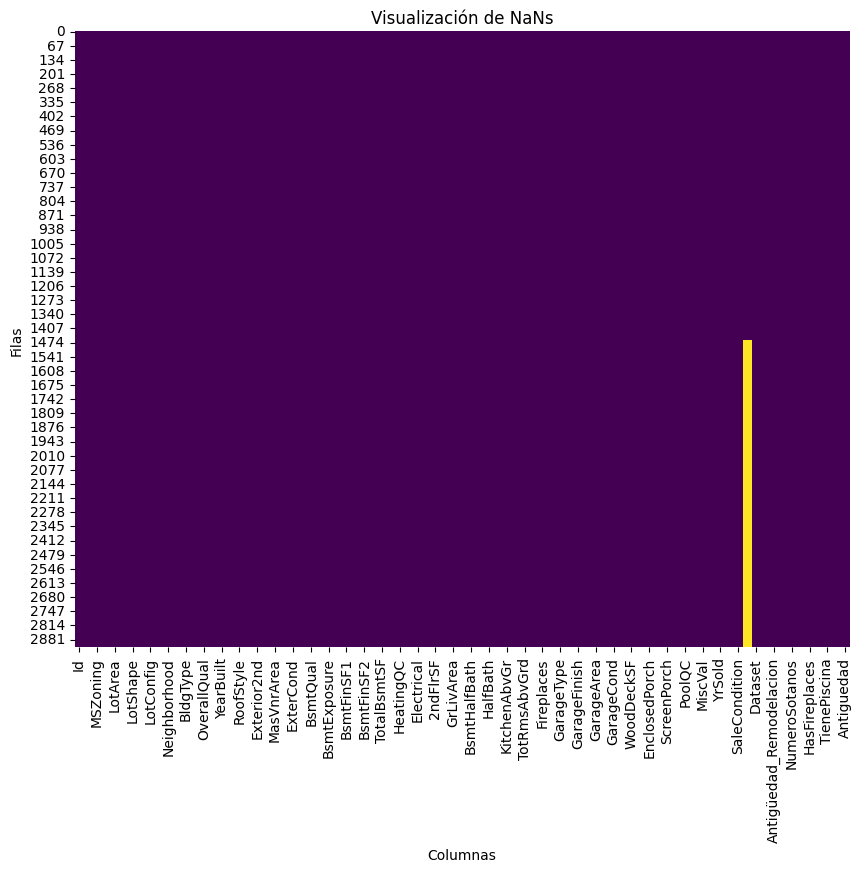

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Visualización de NaNs')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

# Correlaciones con la target

Calcula las correlaciones con el df entero y no solo con train 

In [25]:
calcular_correlaciones_saleprice(df)

c:\Users\Dafne\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1631: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


,Variable 1,Variable 2,Correlación Pearson,Correlación Spearman,Correlación Kendall
2,MSZoning,SalePrice,0.240162,0.278783,0.224139
3,LotFrontage,SalePrice,0.340212,0.398740,0.280003
4,LotArea,SalePrice,0.263843,0.456461,0.314174
14,OverallQual,SalePrice,0.821487,0.667504,0.389477
15,OverallCond,SalePrice,0.320426,0.360722,0.280229
16,YearBuilt,SalePrice,0.522897,0.652682,0.470960
17,YearRemodAdd,SalePrice,0.507118,0.571182,0.412996
20,Exterior2nd,SalePrice,0.274844,0.305896,0.235385
22,MasVnrArea,SalePrice,0.472614,0.415906,0.317220
23,ExterQual,SalePrice,0.682639,0.684014,0.563403


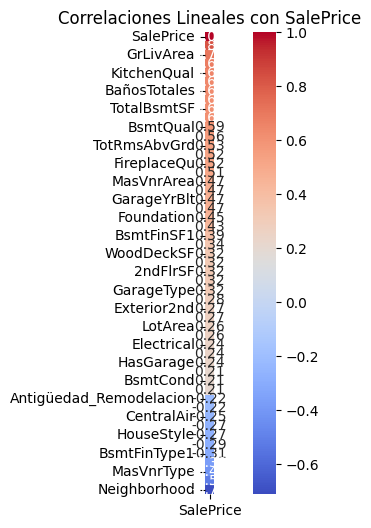

In [26]:
correlaciones_pearson(df)

# Correlaciones entre variables para evitar multicolinealidad

Para asegurar que el modelo resultante sea más robusto y capaz de generalizar mejor a datos no vistos, se realiza la inspección de correlaciones para evitar la multicolinealidad, **no se incluirán las correlaciones con la variable objetivo (`SalePrice`)**.

Se observan correlaciones altas (generalmente > 0.5), donde habría un riesgo de multicolinealidad, lo que afectaría al rendimiento del modelo.

In [35]:
correlaciones = df.corr()

correlaciones = correlaciones.drop(["SalePrice", "Id"], axis=0).drop(["SalePrice", "Id"], axis=1)

correlaciones_filtradas = correlaciones[abs(correlaciones) > 0.5]

correlaciones_filtradas = correlaciones_filtradas.where(np.triu(np.ones(correlaciones.shape), k=1).astype(bool))

correlaciones_melted = correlaciones_filtradas.stack().reset_index()
correlaciones_melted.columns = ["Variable 1", "Variable 2", "Correlación"]

fig = px.scatter(correlaciones_melted, 
                 x="Variable 1", 
                 y="Variable 2", 
                 size=correlaciones_melted["Correlación"].abs(),  
                 color="Correlación", 
                 color_continuous_scale="RdBu",
                 title="Correlaciones mayores a 0.5 entre variables")
fig.update_layout(title_x=0.5)
fig.show()

In [12]:
train = df[df['Dataset'] == 1]
test = df[df['Dataset'] == 2]

Se borra la columna que se creó para el EDA.

In [13]:
train = train.drop(columns=['Dataset'])  
test = test.drop(columns=['Dataset'])

In [14]:
print("Dimensiones del conjunto de entrenamiento (train):", train.shape)
print("Dimensiones del conjunto de prueba (test):", test.shape)

Dimensiones del conjunto de entrenamiento (train): (1460, 86)
Dimensiones del conjunto de prueba (test): (1459, 86)


In [15]:
train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,Antigüedad_Remodelacion,TieneSotano,NumeroSotanos,BañosTotales,HasShed,Antiguedad
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,63160.875711,121965.809590,70.981575,10516.828082,161569.294228,88985.276921,145946.242105,98873.720566,161649.536909,...,2007.815753,132645.524660,120982.274952,180921.195890,13.597260,0.974658,0.794521,2.210616,0.033562,36.547945
std,421.610009,27945.932890,55178.621635,23.478104,9981.264932,40473.211714,23251.313244,47043.947988,46358.822095,36636.762331,...,1.328095,45968.823175,48884.988012,79442.502883,24.476831,0.157217,0.626333,0.785399,0.180160,30.250152
min,1.000000,1162.756647,874.826013,21.000000,1300.000000,4520.642671,1359.444164,4899.887292,517.243045,1729.000758,...,2006.000000,268.083557,435.560070,34900.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,365.750000,69246.171698,150511.492846,60.000000,7553.500000,172000.576834,68155.136005,161800.144292,32712.462964,170349.227179,...,2007.000000,150530.638194,143800.668040,129975.000000,0.000000,1.000000,0.000000,2.000000,0.000000,8.000000
50%,730.500000,69246.171698,150511.492846,70.000000,9478.500000,172000.576834,104491.877911,161800.144292,127519.371522,170349.227179,...,2008.000000,150530.638194,143800.668040,163000.000000,0.000000,1.000000,1.000000,2.000000,0.000000,35.000000
75%,1095.250000,82165.207953,150511.492846,82.000000,11601.500000,172000.576834,104491.877911,161800.144292,127519.371522,170349.227179,...,2009.000000,150530.638194,143800.668040,214000.000000,20.000000,1.000000,1.000000,2.500000,0.000000,54.000000
max,1460.000000,82165.207953,150511.492846,313.000000,215245.000000,172000.576834,104491.877911,161800.144292,127519.371522,170349.227179,...,2010.000000,150530.638194,143800.668040,755000.000000,123.000000,1.000000,2.000000,6.000000,1.000000,136.000000


In [16]:
test.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,Antigüedad_Remodelacion,TieneSotano,NumeroSotanos,BañosTotales,HasShed,Antiguedad
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,0.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,62933.620498,119015.016336,69.611035,9819.161069,159724.754449,89660.746733,146071.237014,100990.161075,163353.391937,...,2007.771076,131843.451935,121528.856066,NaN,12.305003,0.971899,0.806717,2.226182,0.031528,36.413297
std,421.321334,28200.696852,57117.547334,21.710554,4955.517327,43651.188546,22201.280904,46830.384588,45217.359114,32944.259732,...,1.301982,47041.517871,48491.956092,NaN,23.638035,0.165319,0.634780,0.831834,0.174801,30.430606
min,1461.000000,1162.756647,874.826013,21.000000,1470.000000,4520.642671,1359.444164,4899.887292,517.243045,1729.000758,...,2006.000000,268.083557,435.560070,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1825.500000,69246.171698,150511.492846,60.000000,7391.000000,172000.576834,68155.136005,161800.144292,32712.462964,170349.227179,...,2007.000000,150530.638194,143800.668040,NaN,0.000000,1.000000,0.000000,1.500000,0.000000,7.000000
50%,2190.000000,69246.171698,150511.492846,70.000000,9399.000000,172000.576834,104491.877911,161800.144292,127519.371522,170349.227179,...,2008.000000,150530.638194,143800.668040,NaN,0.000000,1.000000,1.000000,2.000000,0.000000,34.000000
75%,2554.500000,82165.207953,150511.492846,80.300000,11517.500000,172000.576834,104491.877911,161800.144292,127519.371522,170349.227179,...,2009.000000,150530.638194,143800.668040,NaN,13.000000,1.000000,1.000000,3.000000,0.000000,55.000000
max,2919.000000,82165.207953,150511.492846,200.000000,56600.000000,172000.576834,104491.877911,161800.144292,127519.371522,170349.227179,...,2010.000000,150530.638194,143800.668040,NaN,127.000000,1.000000,2.000000,7.000000,1.000000,129.000000


Los datos se guardan en dos archivos en formato `.pkl`

In [17]:
train.to_pickle('../data/train.pkl')
test.to_pickle('../data/test.pkl')